In [25]:
import pandas as pd
import numpy as np
import pathlib
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm


# ---------------- DEFINE FUNCTIONS ----------------

# Train the SVM on the training data and predict using the test data
def predict_svm(x_te, x_tr, y_tr):
    every_predictions = []
    svc = svm.SVC()
    svc.fit(x_tr, y_tr)
    prediction = svc.predict(x_te)
    every_predictions.append(prediction)
    return every_predictions


# Check the accuracy of given predictions on the test set y_test
def check_accuracy(y_test, predictions):
    ground_truth = y_test.to_list()
    size = len(ground_truth)
    lst = []

    for predict in predictions:
        count = 0
        for i, j in enumerate(ground_truth):
            if predict[i] == ground_truth[i]:
                count += 1
        lst.append(count / size)
    return lst


# ---------------- PREPARE DATA ----------------
# Load the data
path = '../Datasets/breast-cancer-diagnostic.shuf.lrn.csv'
dirPath = pathlib.Path(path)


# PLOT TIME VS DATASET SIZE

selectionSizeRange = list(range(1, 11, 1))
runtime = dict()
for size in selectionSizeRange:
    runtime[size]=[]
    for i in range(100):
        df=pd.read_csv(dirPath)
        print()
        df = df.sample(int(math.floor(df.shape[0]*size/10)), random_state=35)
        # print(df.head())

        # Set class-label from true/false to 0/1
        df['class'] = df['class'].astype(int)

        # Split into input and target variables
        X = df.iloc[:, 2:]  # Remove the ID and Class columns
        Y = df.iloc[:, 1]

        # Scale data
        x = X.values # returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        #scaler = preprocessing.StandardScaler()
        #x_scaled = scaler.fit_transform(x)
        x_scaled = min_max_scaler.fit_transform(x)
        df_x_scaled = pd.DataFrame(x_scaled)
        # print(df_x_scaled)

        # Import test-data and scaling the data
        pathTest = '../Datasets/breast-cancer-diagnostic.shuf.tes.csv'
        dirPathTest = pathlib.Path(pathTest)
        df_test=pd.read_csv(dirPathTest)

        xTest = df_test.iloc[:, 1:]  # Remove the ID and Class columns
        x_test = xTest.values # returns a numpy array

        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x_test)

        #scaler = preprocessing.StandardScaler()
        #x_scaled = scaler.fit_transform(x_test)

        df_test_normalized = pd.DataFrame(x_scaled)
        # print(df_test_normalized)


        KList = [1, 5, 10, 50, 100, 1000]

        X_train, X_test, Y_train, Y_test = train_test_split(df_x_scaled, Y, test_size=0.1 , random_state=35)

        # RANDOM FORESTS
        start = timeit.default_timer()
        all_predictions = predict_svm(X_test, X_train, Y_train)
        stop = timeit.default_timer()
        time = stop - start
        print('Time: ', time)
        runtime[size].append(time)



Time:  0.001777300000071591

Time:  0.0016084000000091692

Time:  0.0015602999999373424

Time:  0.0015978999999788357

Time:  0.0015868000000409666

Time:  0.001603599999953076

Time:  0.001551699999936318

Time:  0.0015372999999954118

Time:  0.0015650999999934356

Time:  0.0015434000000595915

Time:  0.002173599999991893

Time:  0.001565900000059628

Time:  0.0015910000000758373

Time:  0.0015432000000146218

Time:  0.0015460999999277192

Time:  0.0016453000000637985

Time:  0.001834099999996397

Time:  0.001552199999991899

Time:  0.0015343999999686275

Time:  0.0015157000000272092

Time:  0.0015630000000328437

Time:  0.0015984000000344167

Time:  0.0017772999999579042

Time:  0.0015697000000045591

Time:  0.0015571000000136337

Time:  0.0015357999999423555

Time:  0.001538800000048468

Time:  0.001538100000061604

Time:  0.0015147999999953754

Time:  0.0015765000000556029

Time:  0.0015320999999630658

Time:  0.0015268999999307198

Time:  0.001549599999975726

Time:  0.0015352000


Time:  0.0017179000000169253

Time:  0.0019300000000157524

Time:  0.0017200000000912041

Time:  0.001728200000002289

Time:  0.0017136999999820546

Time:  0.0016977999999880922

Time:  0.0016610999999784326

Time:  0.0016570999999885316

Time:  0.0017821000000139975

Time:  0.0018698000000085813

Time:  0.0017437000000199987

Time:  0.001743499999975029

Time:  0.0018128000000388056

Time:  0.0017804000000296583

Time:  0.0019237999999859312

Time:  0.0017989000000397937

Time:  0.0018341999999620384

Time:  0.0017355999999608684

Time:  0.0018506000000115819

Time:  0.001733599999965918

Time:  0.0018158999999968728

Time:  0.0018191000000342683

Time:  0.0018436000000292552

Time:  0.002048100000024533

Time:  0.0018585000000257423

Time:  0.0018765999999459382

Time:  0.0018105999999988853

Time:  0.0020590999999967607

Time:  0.0018079000000170709

Time:  0.002188400000022739

Time:  0.0019201000000066415

Time:  0.0019637999999986278

Time:  0.0019150000000536238

Time:  0.00185


Time:  0.0020852000000104454

Time:  0.0020096999999168474

Time:  0.0019500000000789441

Time:  0.0020230000000083237

Time:  0.0019805000000587825

Time:  0.0019573999999238367

Time:  0.0019320999999763444

Time:  0.001954400000045098

Time:  0.0019238999999515727

Time:  0.002034200000025521

Time:  0.002138899999977184

Time:  0.001998100000037084

Time:  0.001967400000012276

Time:  0.0019527000000607586

Time:  0.0019615999999587075

Time:  0.00193530000001374

Time:  0.001935800000069321

Time:  0.0019422999999960666

Time:  0.0024044000000458254

Time:  0.002085099999931117

Time:  0.0020191999999497057

Time:  0.002184400000032838

Time:  0.00265460000002804

Time:  0.002733900000066569

Time:  0.0022782000000916014

Time:  0.002730799999994815

Time:  0.0022788999999647785

Time:  0.002177400000050511

Time:  0.0024249000000509113

Time:  0.002139599999964048

Time:  0.002225500000008651

Time:  0.0021864000000277883

Time:  0.002133200000002944

Time:  0.002135399999929177

Time:  0.0026222000000188928

Time:  0.0024720999999772175

Time:  0.0024662000000716944

Time:  0.0024724999999534703

Time:  0.002491299999974217

Time:  0.0024516000000858185

Time:  0.0024802000000363478

Time:  0.0024561000000176136

Time:  0.002443900000002941

Time:  0.0025757000000794505

Time:  0.002486099999941871

Time:  0.0025064999999813153

Time:  0.0024275000000670843

Time:  0.0024118999999700463

Time:  0.0024351000000706335

Time:  0.0024482999999690946

Time:  0.0024386000000049535

Time:  0.0025494999999864376

Time:  0.0025306000000000495

Time:  0.0025653000000147586

Time:  0.002463499999976193

Time:  0.0025203999999803273

Time:  0.002561200000059216

Time:  0.0024435999999923297

Time:  0.0025289999999813517

Time:  0.0025121999999555555

Time:  0.002509300000042458

Time:  0.002442999999971107

Time:  0.002428799999961484

Time:  0.002469600000040373

Time:  0.0027316000000610074

Time:  0.0027542999999923268

Time:  0.002737099999990278

Time:  0.00284050000

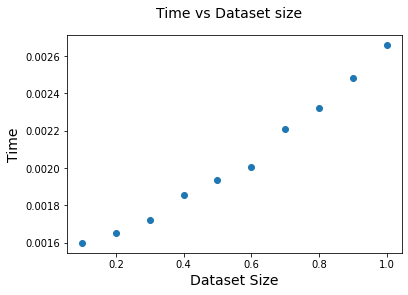

In [39]:
fig = plt.figure()
newList = [x / 10 for x in selectionSizeRange]
plt.scatter(newList, runtimes)
fig.suptitle('Time vs Dataset size', fontsize=14)
plt.xlabel('Dataset Size', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('Breastcancer_SVM_plot_timeVSdatasetsize.png')
plt.show()

In [36]:
runtimes

[0.0015987369999993463,
 0.0016497790000005353,
 0.0017209570000170516,
 0.0018566310000073826,
 0.0019352450000030786,
 0.0020066060000010566,
 0.0022101990000066964,
 0.0023190639999870655,
 0.002481346000004123,
 0.002657827000002726]

In [35]:
runtimes = []
for key in runtime.keys():
    print(runtime[key])
    runtimes.append(sum(runtime[key])/len(runtime[key]))
print(runtimes)

[0.001777300000071591, 0.0016084000000091692, 0.0015602999999373424, 0.0015978999999788357, 0.0015868000000409666, 0.001603599999953076, 0.001551699999936318, 0.0015372999999954118, 0.0015650999999934356, 0.0015434000000595915, 0.002173599999991893, 0.001565900000059628, 0.0015910000000758373, 0.0015432000000146218, 0.0015460999999277192, 0.0016453000000637985, 0.001834099999996397, 0.001552199999991899, 0.0015343999999686275, 0.0015157000000272092, 0.0015630000000328437, 0.0015984000000344167, 0.0017772999999579042, 0.0015697000000045591, 0.0015571000000136337, 0.0015357999999423555, 0.001538800000048468, 0.001538100000061604, 0.0015147999999953754, 0.0015765000000556029, 0.0015320999999630658, 0.0015268999999307198, 0.001549599999975726, 0.0015352000000348198, 0.0014889000000266606, 0.0016382000000021435, 0.0015978999999788357, 0.001553900000089925, 0.0015151000000059867, 0.0015148999999610169, 0.0015235000000757282, 0.0015142000000878397, 0.0015379999999822758, 0.0015551999999843247